Lab 4. Familiarize yourself with interactive image segmentation methods from the scikit-image library. HAB-191 Matychenko A.D. 

1. Get the original color image - a photo of your face, try to ensure uniform lighting
2. Download the received face image. Convert the image to shades of gray using the rgb2gray function

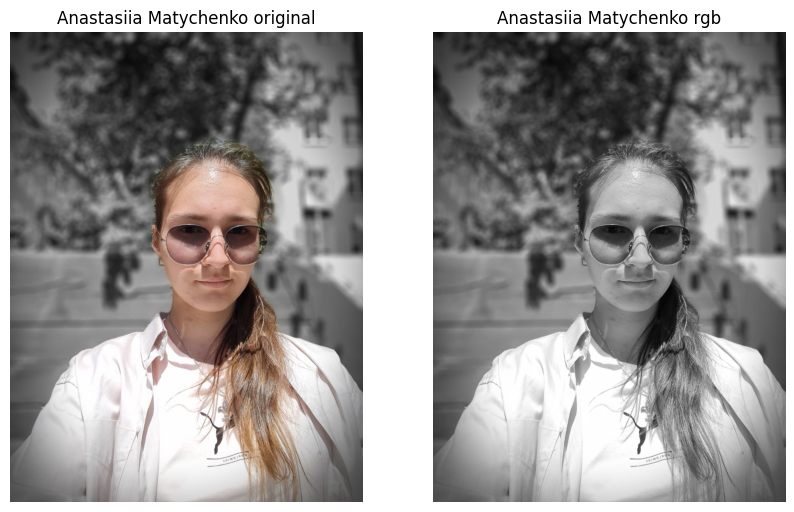

In [109]:
from turtle import color
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

file_path='asserts/me_0.jpg'
image=rgb2gray(io.imread(file_path))

fig,ax=plt.subplots(ncols=2,figsize=(10,8))
ax[0].imshow(io.imread(file_path))
ax[0].axis('off')
ax[0].set_title('Anastasiia Matychenko original')
ax[1].imshow(image,cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Anastasiia Matychenko rgb')
plt.savefig('images/gray_me.jpg')


3. Perform face segmentation using active contours, adjusting the alpha and beta parameters (example 4.2). Show the image with the initial approximation and the image obtained as a result of segmentation

In [110]:
import numpy as np
from skimage.filters import gaussian
from skimage.segmentation import active_contour


def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    return np.array([c, r]).T


def active_counters(init,image,points,file_name):
    snake_10 = active_contour(gaussian(image, 3, preserve_range=False),init, alpha=0.015, beta=0.001, gamma=0.001)
    fig, ax = plt.subplots(ncols=2,figsize=(10, 10))
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].plot(points[:, 0], points[:, 1], '--r', lw=3)
    
    ax[1].imshow(image, cmap=plt.cm.gray)
    ax[1].plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax[1].plot(snake_10[:, 1], snake_10[:, 0], '-b', lw=3)  
    ax[1].set_xticks([]), ax[1].set_yticks([])
    ax[1].axis([0, image.shape[1], image.shape[0], 0])
    plt.savefig(f'images/active_countour/{file_name}.jpg')



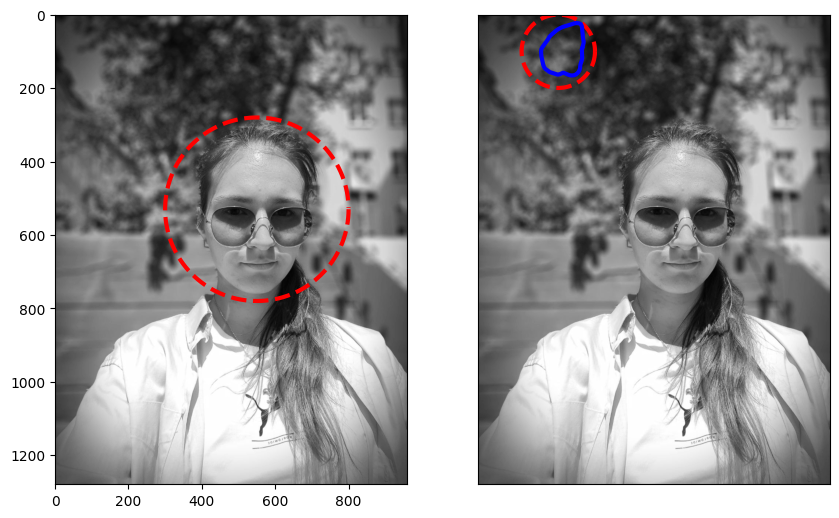

In [111]:
file_name='initial'
s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100 * np.sin(s)
c = 220 + 100 * np.cos (s)
init = np.array([r, c]).T
points = circle_points(400, [530, 550], 250)[:-1]
active_counters(init,image,points,file_name)

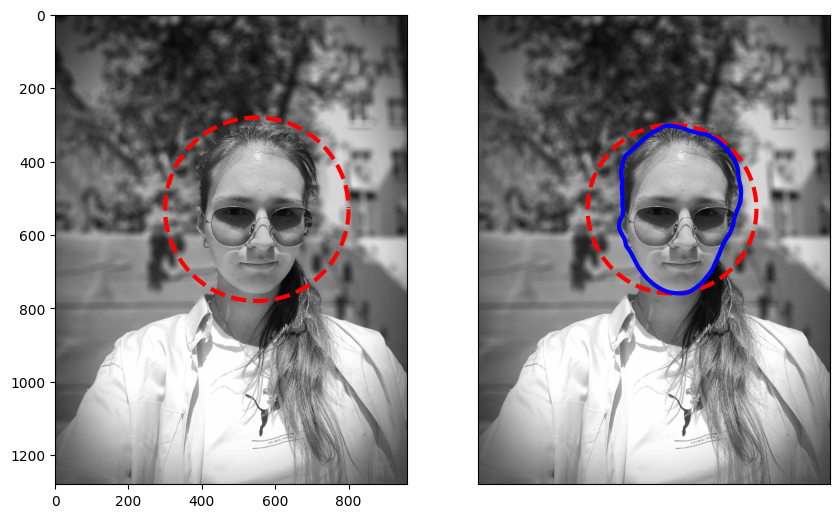

In [112]:
file_name='adjusted'
s = np.linspace(0, 2*np.pi, 400)
r = 530 + 230 * np.sin(s)
c = 530 + 230 * np.cos (s)
init = np.array([r, c]).T
points = circle_points(400, [530, 550], 250)[:-1]
active_counters(init,image,points,file_name)

4. Perform face segmentation using the random walk method, adjusting the beta parameter (examples 4.3, 4.4). Bring the image with the initial approximation and the image obtained as a result of segmentation 

In [163]:
from skimage.segmentation import random_walker


def random_walk(image,points,file_name):
    image_labels = np.zeros(image.shape, dtype=np.uint8)
    image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 2
    points = circle_points(400, [570, 550], 90)[:-1]
    image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 1
    
    image_segmented = random_walker(image, image_labels, mode='bf')
    
    fig, ax = plt.subplots(ncols=2,figsize=(10,10))
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].plot(points[:, 0], points[:, 1], '--r', lw=3)

    ax[1].imshow(image, cmap=plt.cm.gray)
    ax[1].imshow(image_segmented==1, alpha=0.2, cmap=plt.cm.gray)
    plt.savefig(f'images/walk_method/{file_name}.jpg')



C:\Users\zuver\AppData\Local\Temp\ipykernel_37456\2938334861.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 2
C:\Users\zuver\AppData\Local\Temp\ipykernel_37456\2938334861.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

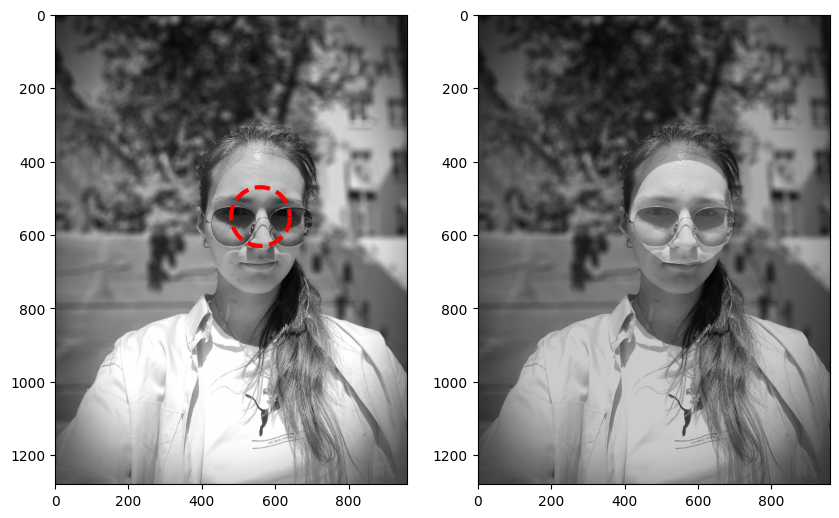

In [155]:
c
random_walk(image,points=points,file_name='initial')

C:\Users\zuver\AppData\Local\Temp\ipykernel_37456\516630944.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image_labels[points[:, 1].astype(np.int), points[:,0].astype(np.int)] = 2
C:\Users\zuver\AppData\Local\Temp\ipykernel_37456\516630944.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

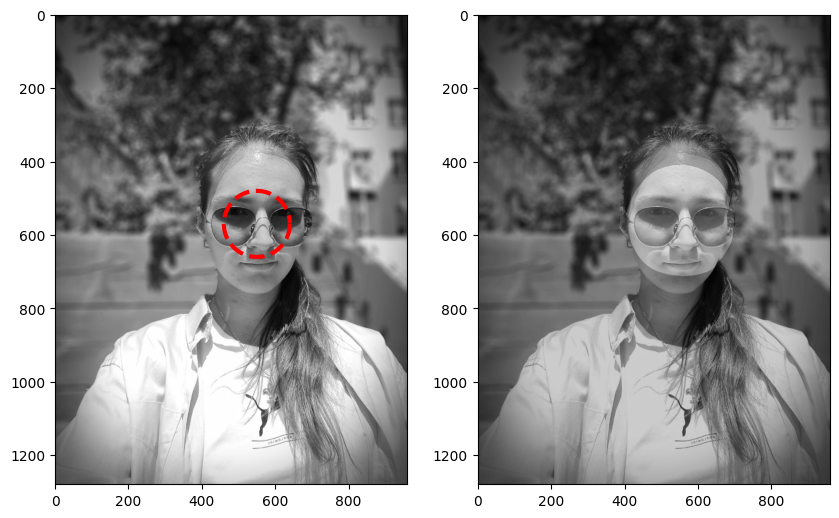

In [164]:
points = circle_points(400, [570, 550], 250)[:-1]
random_walk(image,points=points,file_name='adjusted')